# Customer shopping

## Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from typing import Any
from typing import List

In [2]:
%matplotlib inline

plt.style.use('ggplot')
sns.set(style="whitegrid")

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Funciones utiles

### Gráficas

In [4]:
def pie_plot(data: pd.DataFrame, 
             col: str,
             title: str,
             savefig: bool = False) -> None:
    """Genera un gráfico de torta basado en una columna de un 
     DataFrame.

    Args:
        data (pd.DataFrame): El DataFrame que contiene los datos.
        col (str): El nombre de la columna a graficar.
        title (str): Título de la gráfica.
        savefig (bool): Opcional. Si se quiere guardar la imagen en output.

    Returns:
        None: Muestra el gráfico de pastel.

    """
    plt.figure(figsize=(8, 5))
    
    datos = data[col]
    labels = datos.index
    
    # Generar paleta de colores con Seaborn
    colors = sns.color_palette("blend:#7AB,#EDA", len(datos))
    
    # Generación del diagrama circular
    patches, texts, autotexts = plt.pie(
        datos, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'fontsize': 12})
    
    # Para que siempre se vea como un círculo
    plt.axis('equal')
    
    # Agregar título
    plt.title(title)
    
    # Guardar la figura si savefig es True y se proporciona una ruta
    if savefig:
        path_save = os.path.join('..', 'output', f'{title.replace(" ", "_")}.png')
        plt.savefig(path_save, bbox_inches='tight')
        
    plt.show()

In [5]:
def bar_subplots(df: pd.DataFrame, 
                 columns: List[str],
                 title: str,
                 savefig: bool = False) -> None:
    """Genera diagramas de barras para contar la cantidad 
     según columna especificada.

    Args:
        df: DataFrame que contiene los datos de los hurtos.
        columns: Lista de columnas del DataFrame a 
         mostrar en los diagramas de barras.
        title: Título de la gráfica.
        savefig: Opcional. Si se quiere guardar la imagen 
         en output.

    """
    num_columnas = len(columns)
    num_filas = num_columnas // 2 + num_columnas % 2 

    fig, axs = plt.subplots(num_filas, 2, figsize=(12, 4 * num_filas))
    fig.tight_layout(pad=4.0)
    
    fig.suptitle(title, fontsize=16)

    for i, columna in enumerate(columns):
        ax = axs[i // 2, i % 2] if num_filas > 1 else axs[i]
        valores = df[columna].value_counts()

        ax.bar(valores.index, valores.values)
        ax.set_title(f"Transacciones {columna}")
        plt.xlabel(None)
        ax.yaxis.set_visible(False)
        
        ax.set_xticks(range(len(valores.index))) 
        ax.set_xticklabels(valores.index, rotation=20) 

        for p in ax.patches:
            ax.annotate(
                '{:,.0f}'.format(int(p.get_height())).replace(",", "."),
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)

        for spine in ax.spines:
            ax.spines[spine].set_visible(False)
    
    if savefig:
        path_save = os.path.join('..', 'output', f'{title}.png')
        plt.savefig(path_save, bbox_inches='tight')

    plt.show()

In [6]:
def bar_plot(df: pd.DataFrame, 
             column: str, 
             title: str, 
             savefig: bool = False) -> None:
    """Genera un gráfico de barras para visualizar datos de una columna 
     específica en un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        column (str): El nombre de la columna que se desea visualizar.
        title (str): Título de la gráfica.
        savefig (bool, optional): Indica si se debe guardar la imagen del gráfico.

    """
    plt.figure(figsize=(8, 6))

    ax = sns.barplot(x=df.index, y=df[column], color='skyblue')

    for p in ax.patches:
        ax.annotate(
            '{:,.0f}'.format(int(p.get_height())).replace(",", "."),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(True)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.title(title)
    plt.xlabel('')

    if savefig:
        plt.savefig(
            os.path.join('..', 'output', f'{title.replace(" ", "_")}.png'),
            bbox_inches='tight')

    plt.show()

In [7]:
def bar_numeric(data: pd.DataFrame, 
                col: str, 
                title: str,
                bins: Any = 'auto',
                kde: bool = False,
                xticks: bool = False,
                savefig: bool = False) -> None:
    """Genera un histograma de una columna específica de un DataFrame.
    Esta función toma un DataFrame de pandas, el nombre de una columna, y 
    genera un histograma de los datos en esa columna. Opcionalmente, 
    también puede añadir una estimación de la densidad del kernel (KDE) y 
    guardar la figura en un archivo.

    Args:
        data (pd.DataFrame): DataFrame de pandas que contiene los datos.
        col (str): Nombre de la columna de la cual se generará el histograma.
        title (str): Título del gráfico.
        xticks (bool): Si es True, añade eje x.
        kde (bool, opcional): Si es True, añade una estimación de la densidad del 
         kernel al histograma.
        savefig (bool, opcional): Si es True, guarda la figura en un archivo.

    Returns:
        None

    """
    plt.figure(figsize=(10, 5))
    
    sns.histplot(data[col], kde=kde, color='skyblue', bins=bins)
    
    new_title = f'Distribución de {title}'
    
    plt.title(new_title)
    plt.xlabel('')
    plt.ylabel('Frecuencia')
    
    if xticks:
        plt.xticks(range(1, 6))
    
    if savefig:
        path_save = os.path.join('..', 'output', f'{new_title}.png')
        plt.savefig(path_save, bbox_inches='tight')
    
    plt.show()

# Exploración de datos

## Carga de datos

In [8]:
path = os.path.join('data', 'customer_shopping_data.csv')
shopping_data = pd.read_csv(path)

In [9]:
shopping_data.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [10]:
shopping_data.shape

(99457, 10)

In [11]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


* *invoice_no*: Número de factura.

* *customer_id*: ID del cliente.

* *gender*: Género del cliente.

* *age*: Edad del cliente.

* *category*: Categoría de los productos comprados.

* *quantity*: Cantidad de productos comprados.

* *price*: Precio total de los productos comprados.

* *payment_method*: Método de pago utilizado.

* *invoice_date*: Fecha de la factura.

* *shopping_mall*: Centro comercial donde se realizó la compra.

In [12]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [13]:
shopping_data.describe(include=[object])

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,797,10
top,I138884,C241288,Female,Clothing,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,34487,44447,159,19943


## Visualización de características

El conjunto de datos "Customer Shopping Dataset" contiene información sobre las transacciones de compras realizadas en una tienda minorista en Turquía desde el año 2021 hasta el 2023. Todas las columnas tienen 99,457 entradas no nulas, lo que indica que no hay valores faltantes en el conjunto de datos. Las columnas invoice_no, customer_id, gender, category, payment_method, invoice_date, y shopping_mall son de tipo objeto, lo que sugiere que contienen texto o categorías. Las columnas age, quantity, y price son numéricas, con age y quantity siendo enteros y price siendo de punto flotante.

In [14]:
shopping_categorical = shopping_data.select_dtypes(include=['object'])
shopping_numeric = shopping_data.select_dtypes(include=[np.number])

### Características categóricas

In [15]:
gender = shopping_data.groupby('gender').agg({'customer_id': 'count'})

In [16]:
gender

,customer_id
gender,
Female,59482
Male,39975


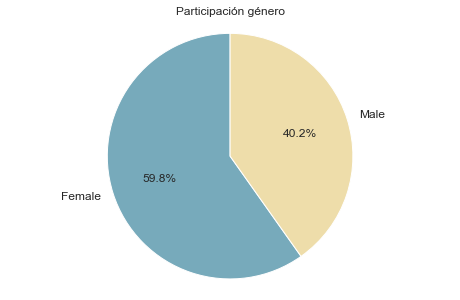

In [17]:
pie_plot(
    data=gender, 
    col='customer_id',
    title='Participación género',
    savefig=True)

* En la gráfica anterior se evidencia que son las mujeres las que tienen una mayor participación en las compras con una diferencia de $19.507$ transacciones de diferencia.

In [18]:
payment_method = shopping_data.groupby('payment_method').agg({'customer_id': 'count'})

In [19]:
payment_method

,customer_id
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079


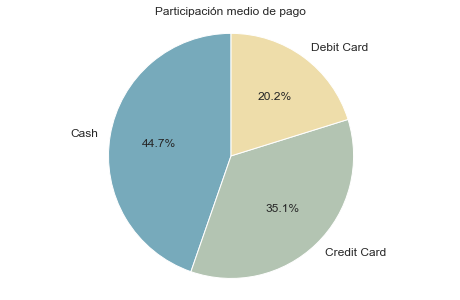

In [20]:
pie_plot(
    data=payment_method, 
    col='customer_id',
    title='Participación medio de pago',
    savefig=True)

* La mayoría de las compras registradas en el data set se realizan con efectivo, teniendo una participación del 44.75%, seguido de las tarjetas crédito y débito con 35.1% y 20.2% respectivamente.

In [21]:
shopping_mall = shopping_data.groupby('shopping_mall').agg({'customer_id': 'count'})

In [22]:
shopping_mall = shopping_mall.sort_values(by='customer_id', ascending=False)

In [23]:
shopping_mall['% participacion'] = shopping_mall['customer_id'] / shopping_mall['customer_id'].sum()

In [24]:
shopping_mall['acumulado'] = shopping_mall['% participacion'].cumsum()

In [25]:
shopping_mall

,customer_id,% participacion,acumulado
shopping_mall,,,
Mall of Istanbul,19943,0.200519,0.200519
Kanyon,19823,0.199312,0.399831
Metrocity,15011,0.150930,0.550761
Metropol AVM,10161,0.102165,0.652925
Istinye Park,9781,0.098344,0.751269
Zorlu Center,5075,0.051027,0.802296
Cevahir AVM,4991,0.050182,0.852479
Forum Istanbul,4947,0.049740,0.902219
Viaport Outlet,4914,0.049408,0.951627


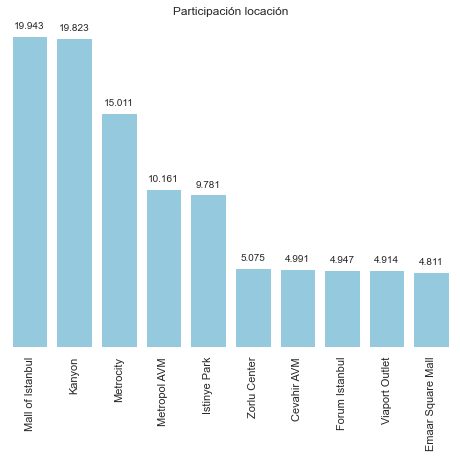

In [26]:
bar_plot(df=shopping_mall, 
         column='customer_id',
         title='Participación locación',
         savefig=True)

* Se evidencia que un poco más de la mitad del total de las transacciones realizadas en el periodo de tiempo estudiado, es decir el 55.07% se centra en 3 centros comerciales: Mall of Istanbul, Kanyon y Metrocity.

In [27]:
category = shopping_data.groupby('category').agg({'customer_id': 'count'})

In [28]:
category = category.sort_values(by='customer_id', ascending=False)

In [29]:
category['% participacion'] = category['customer_id'] / category['customer_id'].sum()

In [30]:
category['acumulado'] = category['% participacion'].cumsum()

In [31]:
category

,customer_id,% participacion,acumulado
category,,,
Clothing,34487,0.346753,0.346753
Cosmetics,15097,0.151794,0.498547
Food & Beverage,14776,0.148567,0.647114
Toys,10087,0.101421,0.748535
Shoes,10034,0.100888,0.849422
Souvenir,4999,0.050263,0.899685
Technology,4996,0.050233,0.949918
Books,4981,0.050082,1.000000


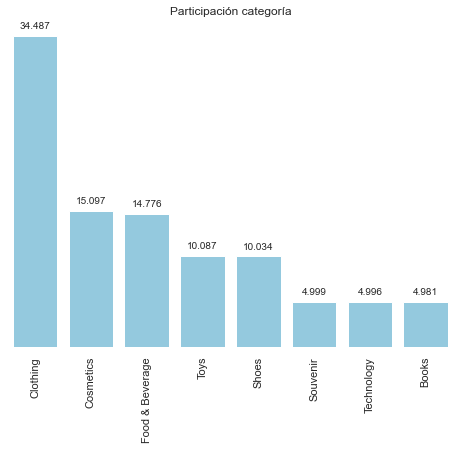

In [32]:
bar_plot(df=category, 
         column='customer_id',
         title='Participación categoría', 
         savefig=True)

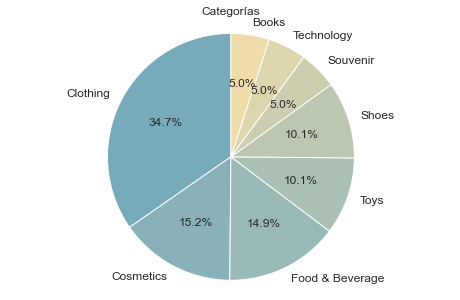

In [33]:
pie_plot(
    data=category.sort_values('customer_id', ascending=False), 
    col='customer_id',
    title='Categorías',
    savefig=True)

* Debido a que el obetivo de esta monografia es tratar de predecir las categorias de compra, es importante realizar un análisis de la distribución de los datos de las 8 categorias, ya que el 35% de las transacciones es de ropa y 5 de las categorias, no alcanzan una participación mayor al 10% de los datos.

### Características numéricas

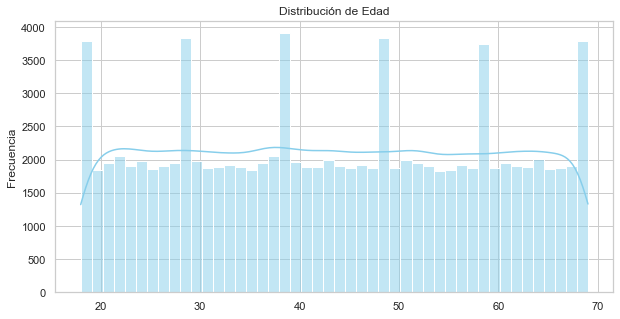

In [34]:
bar_numeric(data=shopping_data, 
            col='age', 
            title='Edad', 
            kde=True, 
            savefig=True)

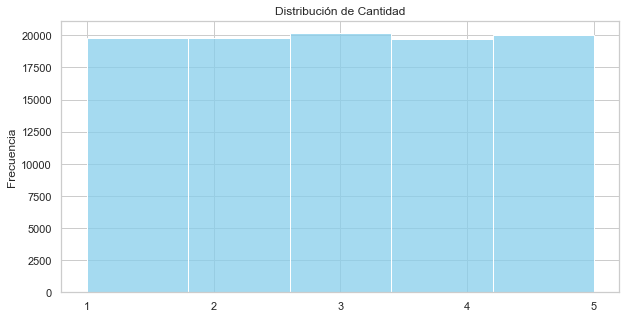

In [35]:
bar_numeric(data=shopping_data, 
            col='quantity', 
            title='Cantidad',
            bins=5,
            xticks=True, 
            savefig=True)

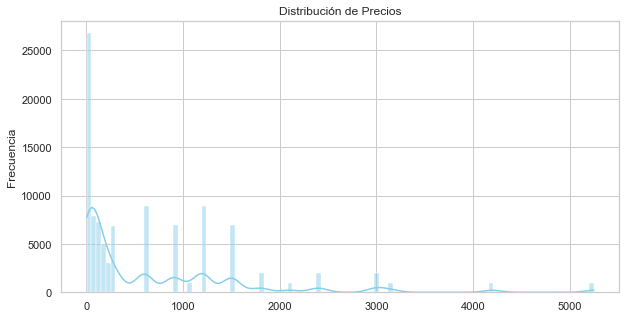

In [36]:
bar_numeric(data=shopping_data, 
            col='price', 
            title='Precios',
            kde=True,
            savefig=True)